# importan los modulos y la base de datos de cancer de pecho

In [40]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [90]:
cancer= load_breast_cancer()
print (cancer)


{'data': array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 

Se muestran las dimensiones de la base de datos. Primero se obtiene la cantidad de instancias, luego los atributos, y por ultimo las clases.

In [91]:
(len(cancer.data),len(cancer.feature_names),len(cancer.target_names))

(569, 30, 2)

# Algoritmos de clasificación
1- AdaBoost
2- Random Forest
3- Naive Bayes
4- Gradient Tree Booster
5- Neural netowrks

Se deben cargar las librerias que se van a utilizar para cada uno de los algoritmos de clasificacion

In [92]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

Separacion del conjunto de datos,  70% para el conjunto de entrenamiento y 30%  del conjunto de pruebas

In [93]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3)

# Clasificador AdaBoost

In [94]:
adaboostclassifier = AdaBoostClassifier().fit(X_train, y_train)
print("Training set score: {:.3f}".format(adaboostclassifier.score(X_train, y_train)))
print("Test set score: {:.3f}".format(adaboostclassifier.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.971


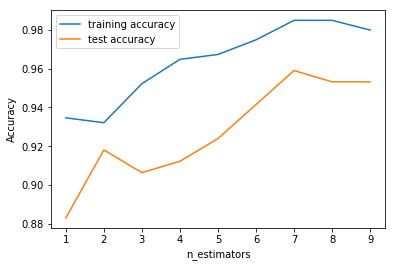

In [95]:
from sklearn.ensemble import AdaBoostClassifier
training_acc = []
test_acc = []
rango = range(1, 10)
for n in rango:
    adaboost = AdaBoostClassifier(n_estimators=n).fit(X_train, y_train)
    training_acc.append(adaboost.score(X_train, y_train))
    test_acc.append(adaboost.score(X_test, y_test))
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()

In [156]:
adaboostclassifier = AdaBoostClassifier(n_estimators=2).fit(X_train, y_train)
print("Training set score: {:.3f}".format(adaboostclassifier.score(X_train, y_train)))
print("Test set score: {:.3f}".format(adaboostclassifier.score(X_test, y_test)))

Training set score: 0.907
Test set score: 0.947


El valor optimo de n estimators es igual a 2

# Clasificador RandomForest

In [169]:
training_accuracy_rf = []
test_accuracy_rf = []
n_range = range(1,15)
for n in n_range:
    rf_clf = RandomForestClassifier(max_depth=5, n_estimators=n, max_features=2)
    rf_clf.fit(X_train, y_train)
    training_accuracy_rf.append(rf_clf.score(X_train, y_train))
    test_accuracy_rf.append(rf_clf.score(X_test, y_test))

(training_set_score, test_set_score)

(0.96733668341708545, 0.91228070175438591)

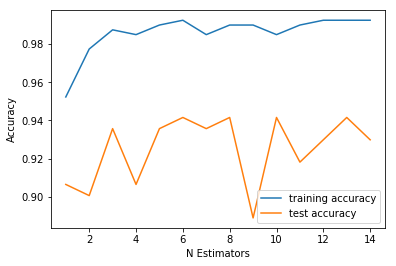

In [111]:
plt.plot(n_range, training_accuracy_rf, label="training accuracy")
plt.plot(n_range, test_accuracy_rf, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("N Estimators")
plt.legend()

correccion de overfitting con parametro n=2

In [157]:
rf_clf = RandomForestClassifier(n_estimators=2)
rf_clf.fit(X_train, y_train)
training_set_score = rf_clf.score(X_train, y_train)
test_set_score = rf_clf.score(X_test, y_test)

(training_set_score, test_set_score)

(0.96733668341708545, 0.91228070175438591)

# Clasificador Naive Bayes

In [99]:
gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train, y_train).predict(X_train)
gaussian_score_training = gaussian_clf.score(X_train, y_train)
gaussian_score_test = gaussian_clf.score(X_test, y_test)

(gaussian_score_training,gaussian_score_test )

(0.94723618090452266, 0.92397660818713445)

# Gradient tree booster

In [165]:
gradboost = GradientBoostingClassifier().fit(X_train, y_train)
print("Training set score: {:.3f}".format(gradboost.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gradboost.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.971


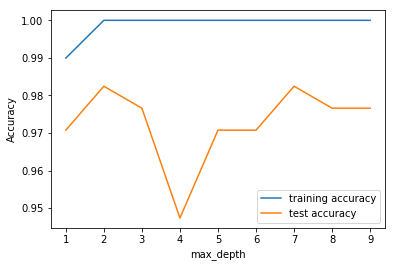

In [166]:
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

Con valor de depth=1 se evita el overfitting

In [168]:
gradboost = GradientBoostingClassifier(max_depth=1).fit(X_train, y_train)
print("Training set score: {:.3f}".format(gradboost.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gradboost.score(X_test, y_test)))

Training set score: 0.990
Test set score: 0.971


# Neural Networks MLP

In [189]:
_cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [190]:
cancer['data'].shape

(569, 30)

In [191]:
X = cancer['data']
y = cancer['target']

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [193]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [194]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [195]:
from sklearn.neural_network import MLPClassifier

In [196]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [197]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [198]:
predictions = mlp.predict(X_test)

In [199]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[43  1]
 [ 3 96]]


In [202]:
print("Training set score: {:.3f}".format(mlp.score(X_train, y_train)))
print("Test set score: {:.3f}".format(mlp.score(X_test, y_test)))

Training set score: 0.995
Test set score: 0.972


# CROSS VALIDATION

In [203]:
from sklearn.model_selection import cross_val_score
adaboost = AdaBoostClassifier(n_estimators=2)
scores = cross_val_score(i, cancer.data, cancer.target)
print("Cross-validation scores de",adaboost,": {}".format(scores))

Cross-validation scores de AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=2, random_state=None) : [ 0.91578947  0.88947368  0.89417989]


In [204]:
from sklearn.model_selection import cross_val_score
adaboost = RandomForestClassifier(n_estimators=2)
scores = cross_val_score(i, cancer.data, cancer.target)
print("Cross-validation scores de",adaboost,": {}".format(scores))

Cross-validation scores de RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) : [ 0.91578947  0.88947368  0.89417989]


In [205]:
from sklearn.model_selection import cross_val_score
adaboost = GaussianNB()
scores = cross_val_score(i, cancer.data, cancer.target)
print("Cross-validation scores de",adaboost,": {}".format(scores))

Cross-validation scores de GaussianNB(priors=None) : [ 0.91578947  0.88947368  0.89417989]


In [206]:
from sklearn.model_selection import cross_val_score
adaboost = GradientBoostingClassifier(max_depth=1)
scores = cross_val_score(i, cancer.data, cancer.target)
print("Cross-validation scores de",adaboost,": {}".format(scores))

Cross-validation scores de GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False) : [ 0.91578947  0.88947368  0.89417989]


In [208]:
from sklearn.model_selection import cross_val_score
adaboost = MLPClassifier()
scores = cross_val_score(i, cancer.data, cancer.target)
print("Cross-validation scores de",adaboost,": {}".format(scores))

Cross-validation scores de MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False) : [ 0.91578947  0.88947368  0.89417989]


# CONCLUSIONES

Los algoritmos de clasificacion ADABoost y RandomForest tienden a generar overfitting usando los parámetros default, al utilizar n= 2 se eliminó el overfitting en ambos casos. El clasificador Naive Bayes presenta buenos resultados con los parámetros por defecto. Gradient tree booster utilizando un valor default de 3 de profundidad, al disminuir este valor a 1 se reduce el overfitting, sin embargo este el valor de entrenamiento sigue siendo cercano a 1 (0.99).
Los algoritmos que obtuvieron el menor porcentaje de instancias correctamente clasificadas fueron el Naive Bayes y AdaBoost. El algoritmo MLP fue el que obtuvo el mejor porcentaje de instancias correctamente clasificadas (97%) 


